# Problem Statement: -

This dataset is realted to the video gaming industry and a survey was coducted to build recommendation engine so that the store can improve the sales of its gaming DVD’s. Snapshot the dataset is given below build a recommendation engine and suggest top selling dvds to the store customers.


# Objective :-
    build recommendation engine so that the store can improve the sales of its gaming DVD’s

In [5]:
import pandas as pd
import seaborn as sns
# import Dataset 
games = pd.read_csv("D:/360Digi/game.csv")
games.shape # shape
games.columns
games

,userId,game,rating
0,3,The Legend of Zelda: Ocarina of Time,4.0
1,6,Tony Hawk's Pro Skater 2,5.0
2,8,Grand Theft Auto IV,4.0
3,10,SoulCalibur,4.0
4,11,Grand Theft Auto IV,4.5
...,...,...,...
4995,4529,Donut County,2.5
4996,4533,MotorStorm: Apocalypse,3.0
4997,4544,The Last Guy,3.0
4998,4548,Valiant Hearts: The Great War,4.0


# EDA

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

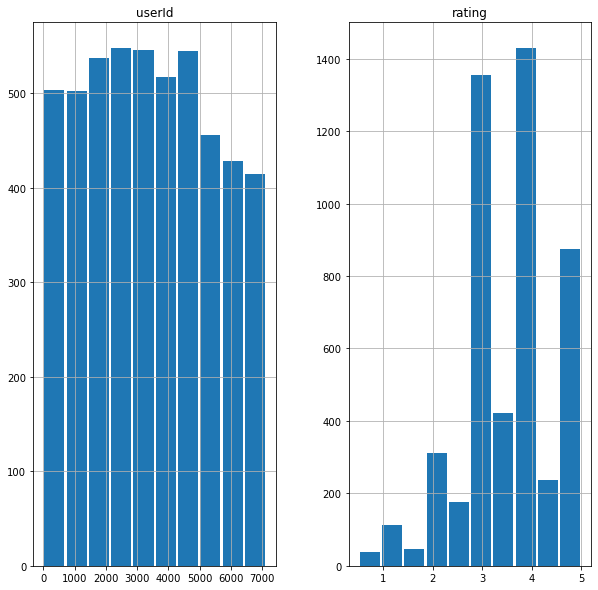

In [6]:
games.hist(grid=True, rwidth=0.9, figsize=(10,10)) 

(array([617., 595., 526., 572., 554., 503., 445., 432., 402., 354.]),
 array([   0. ,  343.7,  687.4, 1031.1, 1374.8, 1718.5, 2062.2, 2405.9,
        2749.6, 3093.3, 3437. ]),
 <BarContainer object of 10 artists>)

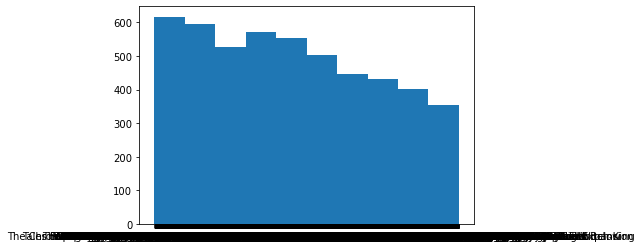

In [14]:
plt.hist(games.game)

<AxesSubplot:>

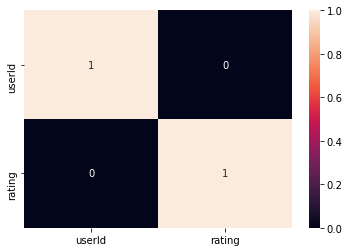

In [7]:
a = games.corr(method ='pearson')
sns.heatmap(a>0.85,annot=True)

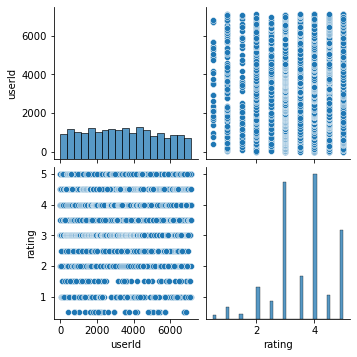

<Figure size 576x576 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

sns.pairplot(games)
plt.figure(figsize=(8,8))
plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer #term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 

# replacing the NaN values in overview column with empty string
games["game"].isnull().sum() 
games["game"] = games["game"].fillna(" ")


In [3]:

# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrix = tfidf.fit_transform(games.game)   #Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix.shape

(5000, 3068)

In [5]:
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

# creating a mapping of movie name to index number 
game_index = pd.Series(games.index, index = games['game'])
game_index = game_index[~game_index.index.duplicated(keep='first')]

game_id = game_index["SoulCalibur"]
game_id


3

In [23]:

def get_recommendations(Name, topN):    
    # topN = 10
    # Getting the movie index using its title 
    game_id = game_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # game
    cosine_scores = list(enumerate(cosine_sim_matrix[game_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    
# Getting the game index 
    game_idx  =  [i[0] for i in cosine_scores_N]
    game_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar game and scores
    game_similar_show = pd.DataFrame(columns=["game", "Score"])
    game_similar_show["name"] = games.loc[game_idx, "game"]
    game_similar_show["Score"] = game_scores
    game_similar_show.reset_index(inplace = True)  
    # anime_similar_show.drop(["index"], axis=1, inplace=True)
    print (game_similar_show)
    # return (anime_similar_show)


In [24]:

# Enter your game and number of game's to be recommended 
get_recommendations("SoulCalibur", topN = 10)
game_index["SoulCalibur"]


    index game     Score                         name
0       3  NaN  1.000000                  SoulCalibur
1    3132  NaN  1.000000                SoulCalibur V
2    3925  NaN  1.000000                  SoulCalibur
3    4921  NaN  1.000000                SoulCalibur V
4     138  NaN  0.848421               SoulCalibur II
5     165  NaN  0.848421               SoulCalibur II
6     213  NaN  0.848421               SoulCalibur II
7    1204  NaN  0.795409              SoulCalibur III
8    1445  NaN  0.783060               SoulCalibur IV
9    1450  NaN  0.783060               SoulCalibur IV
10   3654  NaN  0.570041  SoulCalibur: Broken Destiny


3

# Summary
1- User based recommentation systems

2- Top 10 recommendation for games are showed above for SoulCalibur. 

3- Item based recommentation systems